In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-screen-time/Screentime - App Details.csv
/kaggle/input/analyzing-screen-time/Screentime - App Ranking.csv
/kaggle/input/analyzing-screen-time/Screentime - Overall Usage.csv


Phone Usage and Screen Time

Let's take a look at the most popular app of the dataset!

Does the phone usage time correlates with the number of notifications? Which app is the most popular?

### Import libraries

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

/kaggle/input/analyzing-screen-time/Screentime - App Details.csv
/kaggle/input/analyzing-screen-time/Screentime - App Ranking.csv
/kaggle/input/analyzing-screen-time/Screentime - Overall Usage.csv


In [25]:
df = pd.read_csv('/kaggle/input/analyzing-screen-time/Screentime - Overall Usage.csv')
df.head()

,Date,Total Usage,Notifications,Unlocks
0,08/26/2022,236,600,102
1,08/27/2022,194,411,96
2,08/28/2022,301,709,114
3,08/29/2022,190,542,119
4,08/30/2022,204,583,85


### Overall Usage

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           27 non-null     object
 1   Total Usage    27 non-null     int64 
 2   Notifications  27 non-null     int64 
 3   Unlocks        27 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 992.0+ bytes


In [27]:
df.columns

Index(['Date ', 'Total Usage', 'Notifications', 'Unlocks'], dtype='object')

In [28]:
df.columns = ['Date', 'Total Usage', 'Notifications', 'Unlocks']

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

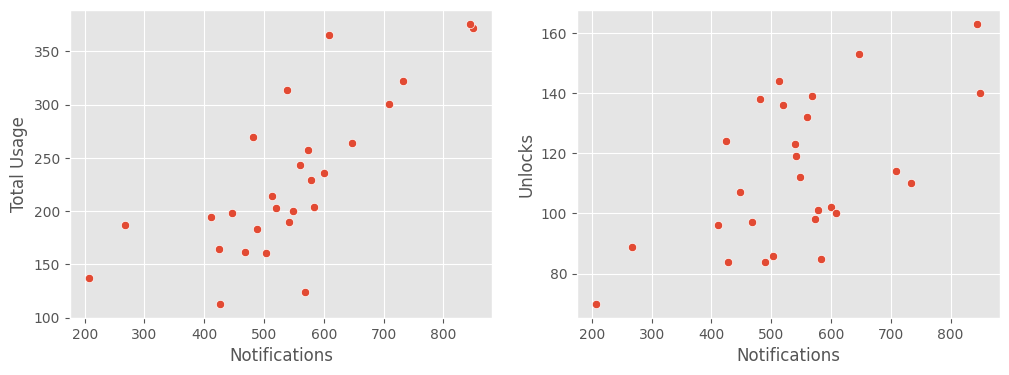

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=df, x='Notifications', y='Total Usage')
sns.scatterplot(ax=ax[1], data=df, x='Notifications', y='Unlocks')

plt.show()

Both total usage and unlocks are correlated with the number of notifications

## App Details

In [31]:
ad = pd.read_csv('/kaggle/input/analyzing-screen-time/Screentime - App Details.csv')
ad.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [32]:
ad.columns

Index(['Date', 'Usage', 'Notifications', 'Times opened', 'App'], dtype='object')

In [33]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [34]:
ad['Date'] = pd.to_datetime(ad['Date'])

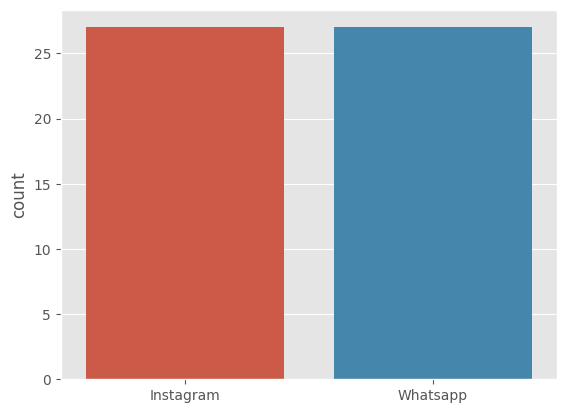

In [35]:
sns.countplot(data=ad, x='App')
plt.xlabel(None)
plt.show()

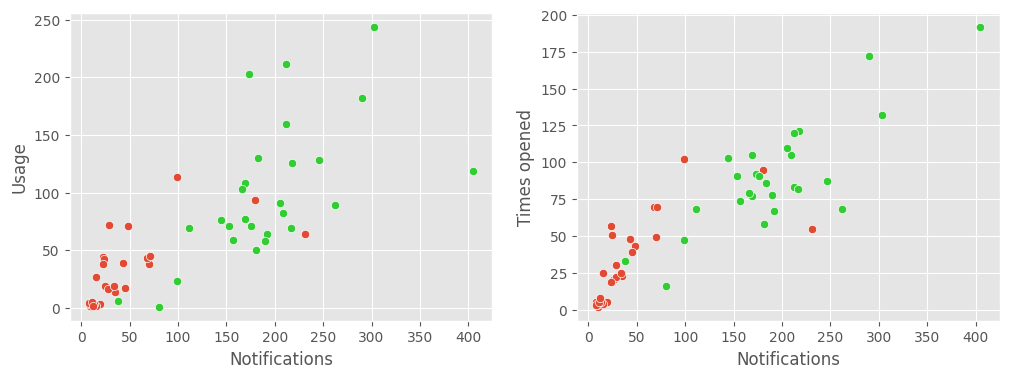

In [36]:
fig, ax = plt.subplots(1,2, sharex=True, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=ad[ad.App == 'Instagram'], x='Notifications', y='Usage')
sns.scatterplot(ax=ax[1], data=ad[ad.App == 'Instagram'], x='Notifications', y='Times opened')

sns.scatterplot(ax=ax[0], data=ad[ad.App == 'Whatsapp'], x='Notifications', y='Usage', color='limegreen')
sns.scatterplot(ax=ax[1], data=ad[ad.App == 'Whatsapp'], x='Notifications', y='Times opened', color='limegreen')

plt.show()

There are much more notifications from What's App than Instagram

In addition the maximum time spend on Instagram seems to only increase linearly up to a certain points before going down.

## App Ranking

In [37]:
ar = pd.read_csv('/kaggle/input/analyzing-screen-time/Screentime - App Ranking.csv')
ar.head()

,Date,Rank 1,Rank 2,Rank 3
0,08/26/2022,Whatsapp,Instagram,Netflix
1,08/27/2022,Whatsapp,Instagram,Chrome
2,08/28/2022,Whatsapp,Instagram,WeChat
3,08/29/2022,Whatsapp,Chrome,WeChat
4,08/30/2022,Whatsapp,LinkedIn,Chrome


In [38]:
ar.columns = ['Date', 'Rank 1', 'Rank 2', 'Rank 3']

In [39]:
ar['Date'] = pd.to_datetime(ar['Date'])

In [40]:
ar['Rank 2'].value_counts()

Rank 2
Instagram    8
Zoom         4
WeChat       4
Whatsapp     3
Gallery      2
Spotify      2
Chrome       1
LinkedIn     1
YouTube      1
Maps         1
Name: count, dtype: int64

In [41]:
ar['Rank 3'].value_counts()

Rank 3
WeChat       8
Chrome       5
Instagram    5
Gmail        2
Maps         2
Netflix      1
Spotify      1
YouTube      1
Linkedin     1
Hulu         1
Name: count, dtype: int64

In [42]:
rank1 = set(ar['Rank 1'].unique())
rank2 = set(ar['Rank 2'].unique())
rank3 = set(ar['Rank 3'].unique())

app_list = rank1.union(rank2).union(rank3)
print(app_list)

{'Instagram', 'WeChat', 'Whatsapp', 'Zoom', 'LinkedIn', 'YouTube', 'Gmail', 'Facebook', 'Chrome', 'Netflix', 'Hulu', 'Spotify', 'Maps', 'Linkedin', 'Gallery'}


In [43]:
ranking = ar[['Date', 'Rank 1', 'Rank 2', 'Rank 3']].copy()
for app in app_list:
    ranking[app] = ''

for app in app_list:
    for index, row in ranking.iterrows():
        if row['Rank 1'] == app:
            ranking[app].iloc[index] = 1
        elif row['Rank 2'] == app:
            ranking[app].iloc[index] = 2
        elif row['Rank 3'] == app:
            ranking[app].iloc[index] = 3
        else:
            ranking[app].iloc[index] = 4
            
ranking.drop(['Rank 1', 'Rank 2', 'Rank 3'], axis=1, inplace=True)
ranking.head()

<ipython-input-43-d7310fd55c58>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ranking[app].iloc[index] = 2
<ipython-input-43-d7310fd55c58>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

,Date,Instagram,WeChat,Whatsapp,Zoom,LinkedIn,YouTube,Gmail,Facebook,Chrome,Netflix,Hulu,Spotify,Maps,Linkedin,Gallery
0,2022-08-26,2,4,1,4,4,4,4,4,4,3,4,4,4,4,4
1,2022-08-27,2,4,1,4,4,4,4,4,3,4,4,4,4,4,4
2,2022-08-28,2,3,1,4,4,4,4,4,4,4,4,4,4,4,4
3,2022-08-29,4,3,1,4,4,4,4,4,2,4,4,4,4,4,4
4,2022-08-30,4,4,1,4,2,4,4,4,3,4,4,4,4,4,4


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

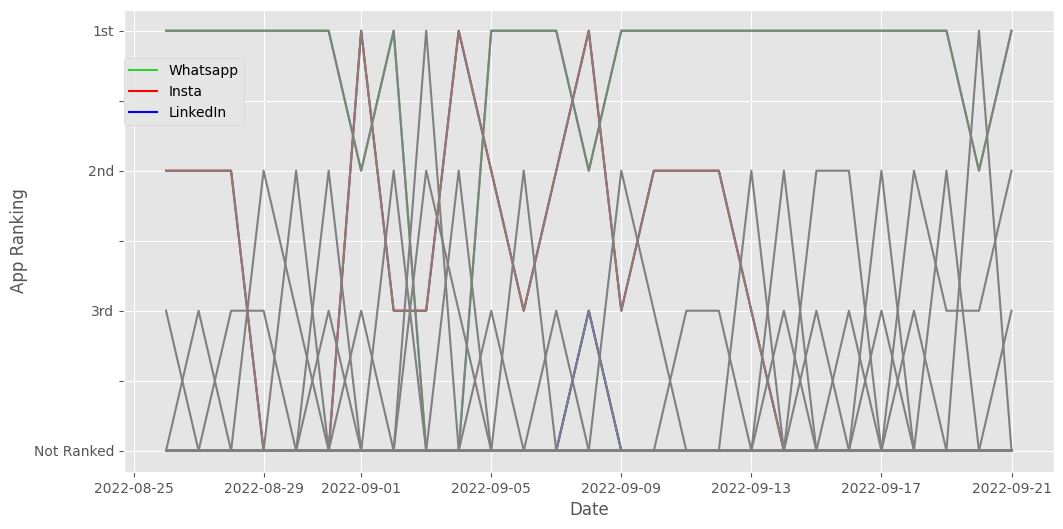

In [44]:
figure = plt.figure(figsize=(12,6))


sns.lineplot(data=ranking, x='Date', y='Whatsapp', color='limegreen', label='Whatsapp').invert_yaxis()
sns.lineplot(data=ranking, x='Date', y='Instagram', color='red', label='Insta')
sns.lineplot(data=ranking, x='Date', y='Linkedin', color='blue', label='LinkedIn')

for app in app_list:
    sns.lineplot(data=ranking, x='Date', y=app, color='grey')

plt.yticks(ticks=[1,1.5,2,2.5,3,3.5,4],labels = ['1st', '', '2nd', '', '3rd', '', 'Not Ranked'])
plt.ylabel("App Ranking")
plt.legend(loc=(0,0.75))
plt.show()

## Observation

WhatsApp is the most use app on this phone. Its usage increase linearly with the number of notifications

Instagram is the second most popular app, however, its usage is not as regular as Whatsapp

linkedin is 3rd